# Workshop 2 - Data Visualization

Glad you made it through the first workshop! This week we'll cover data visaulization, an important part of **Exploratory Data Analysis (EDA)**.

Wait, what's EDA?

Exploratory Data Analysis is the process of familiarizing yourself with a dataset. By understanding your dataset you clear up misconceptions and gain ideas to proceed with your data.  In fact, the first two steps of The Data Science Process (Data Inspection and Data Cleaning) is part of EDA! Like all the other steps, you'll find yourself performing EDA throughout your analysis to answer questions you may have.

In this tutorial we'll build upon your EDA skills by teaching you how to visualize your data through graphs and other visuals. Although numbers can tell us a satisfying story, we perform **Data Visualization** to highlight trends difficult to identify in tabular form. Moreover, Data Visualization is one of the strongest tools to help us communicate ideas to those reading our papers.
 
Let's get started by importing our libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime # since our data set requires datetime objects

We'll talk about Seaborn and Matplotlib in a minute. For now, let's start by importing the data frame from last week's workshop (recall the `.pickle` file)!

In [2]:
path = "/Users/curtis/Desktop/analysis/2019_bdc_workshops/"
timeHourRainfallDF = pd.read_pickle(path + "Saved_Dataframes/workshop1RainfallDF")
timeHourRainfallDF.head()

name                date  rainfall  longitude  latitude  rainfall_in_cm  \
0  RG_001 2017-05-01 00:00:00     0.000 -79.478112  43.64768            0.00   
1  RG_001 2017-05-01 00:05:00     0.254 -79.478112  43.64768            2.54   
2  RG_001 2017-05-01 00:10:00     1.016 -79.478112  43.64768           10.16   
3  RG_001 2017-05-01 00:15:00     0.000 -79.478112  43.64768            0.00   
4  RG_001 2017-05-01 00:20:00     0.000 -79.478112  43.64768            0.00   

  name_without_RG_  is_above_toronto_midpoint_latitude  rainfall_delta  
0              001                                   0             NaN  
1              001                                   0           0.254  
2              001                                   0           0.762  
3              001                                   0          -1.016  
4              001                                   0           0.000

## Seaborn Basics

Seaborn is a useful library to view your data as a graph. This is a pretty expansive library and includes basically all types of graphs known to man (and most definitely everything you've learned in a stats course). 

Then what's MatplotLib?

MatplotLib is a predesesor to Seaborn, in fact, Seaborn was built ontop of MatplotLib. We'll be using matplotlib functions throughout this workshop since it will affect our Seaborn plots.

Anyway, let's use Seaborn's `scatterplot()` function to plot the amount of rain by the time of day.

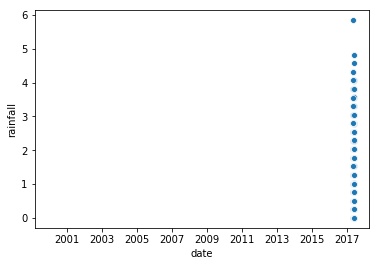

In [3]:
sns.scatterplot(x="date",y="rainfall", data=timeHourRainfallDF)

That's really weird. The x-axis is too expansive, we need to limit it. Let's use the `set_xlim()` function to fix this. Every plot in MatplotLib is defined by a figure (`fig`) and axis (`ax`) object. These change how data is displayed. Since the range of the x-axis is controlled by the axis (`ax`) object, `set_xlim()` is a function that belongs to the `ax` object. Things will be a bit more clear below.

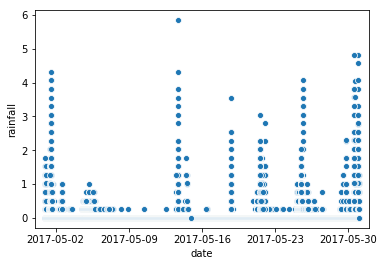

In [4]:
fig, ax = plt.subplots()
ax.set_xlim([datetime(2017, 4, 30), datetime(2017, 6, 1)]) # since our data lies between the month of May 2017
sns.scatterplot(x="date",y="rainfall", data=timeHourRainfallDF)

Much better! However, the graph seems a bit small. Let's enlarge it by tweaking MatplotLib's global variables.

In [5]:
plt.rcParams["figure.figsize"] = "15, 8"
font = {'size': 16} #You can tweak around with the font params to make them prettier.
plt.rc('font', **font) #Note: You only need to modify font global variables once and your changes will persist.

Now let's try plotting it again!

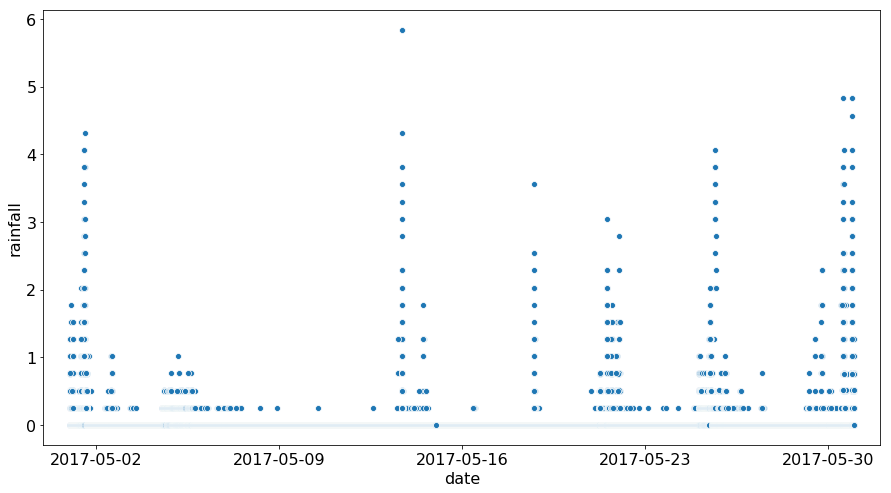

In [6]:
fig, ax = plt.subplots()
ax.set_xlim([datetime(2017, 4, 30), datetime(2017, 6, 1)]) # since our data lies between the month of May 2017
sns.scatterplot(x="date",y="rainfall", data=timeHourRainfallDF)

We can also set a title for the graph.

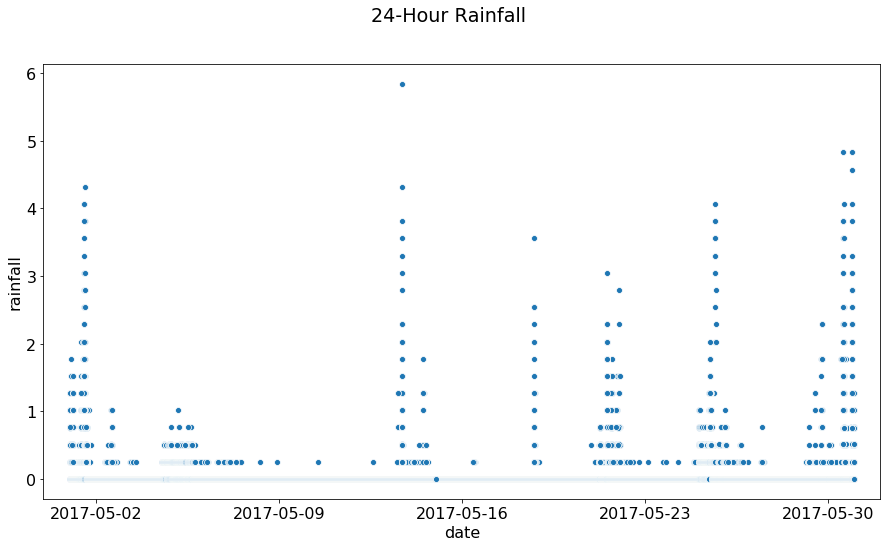

In [7]:
fig, ax = plt.subplots()
fig.suptitle("24-Hour Rainfall")

ax.set_xlim([datetime(2017, 4, 30), datetime(2017, 6, 1)]) # since our data lies between the month of May 2017
sns.scatterplot(x="date",y="rainfall", data=timeHourRainfallDF)

That looks great! you can save your graph by right-clicking on the image and select "save as". You can also preview them as larger images by right-clicking and opening your graph in a new tab.

If you want to save your graphs programmatically you can run `fig.savefig('file_name.png')`

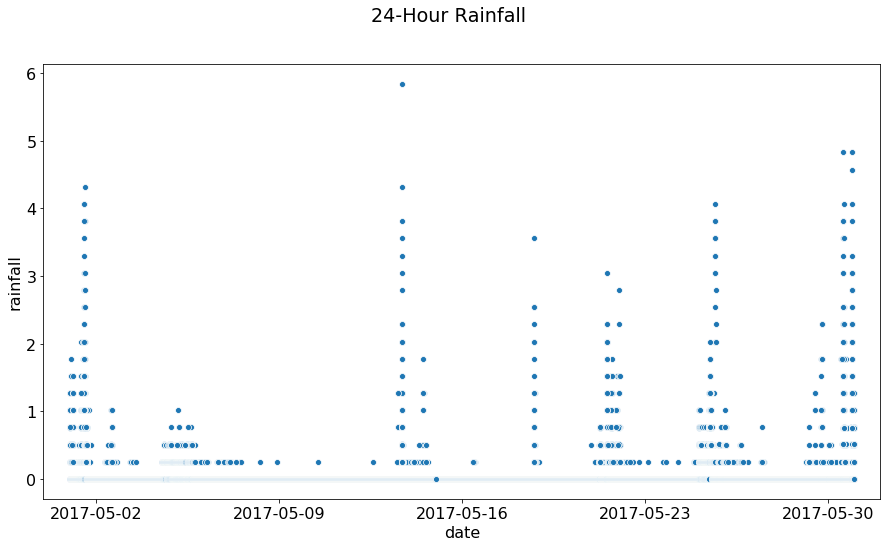

In [8]:
fig, ax = plt.subplots()
fig.suptitle("24-Hour Rainfall")

ax.set_xlim([datetime(2017, 4, 30), datetime(2017, 6, 1)]) # since our data lies between the month of May 2017
sns.scatterplot(x="date",y="rainfall", data=timeHourRainfallDF)

fig.savefig('24-Hour_Rainfall.png')

To be honest I wasn't expecting spikes as clear as the ones shown above. And that's the beauty of graphing! It allows you to visually see patterns you might miss. Here you can clearly see when it rains the most and least in Toronto.

One of my favourite things to do is to plot two different variables against each other and look at their correlation (http://www.statisticshowto.com/what-is-correlation/). This will allow us to see which pairs of variables seem to have the most correlation with each other.

We'll begin by running the Pandas `corr()` function to return a correlation matrix in the form of a data frame.

In [9]:
corr = timeHourRainfallDF.corr()
corr

rainfall  longitude  latitude  \
rainfall                            1.000000   0.015102  0.005146   
longitude                           0.015102   1.000000  0.456896   
latitude                            0.005146   0.456896  1.000000   
rainfall_in_cm                      1.000000   0.015102  0.005146   
is_above_toronto_midpoint_latitude  0.006364   0.351684  0.595825   
rainfall_delta                      0.447953   0.000038  0.000017   

                                    rainfall_in_cm  \
rainfall                                  1.000000   
longitude                                 0.015102   
latitude                                  0.005146   
rainfall_in_cm                            1.000000   
is_above_toronto_midpoint_latitude        0.006364   
rainfall_delta                            0.447953   

                                    is_above_toronto_midpoint_latitude  \
rainfall                                                  6.363581e-03   
longitude                                                 3.516842e-01   
latitude                                                  5.958245e-01   
rainfall_in_cm                                            6.363581e-03   
is_above_toronto_midpoint_latitude                        1.000000e+00   
rainfall_delta                                           -8.659990e-20   

                                    rainfall_delta  
rainfall                              4.479533e-01  
longitude                             3.825084e-05  
latitude                              1.712458e-05  
rainfall_in_cm                        4.479533e-01  
is_above_toronto_midpoint_latitude   -8.659990e-20  
rainfall_delta                        1.000000e+00

Now let's use Seaborn's `heatmap()` function to plot it!

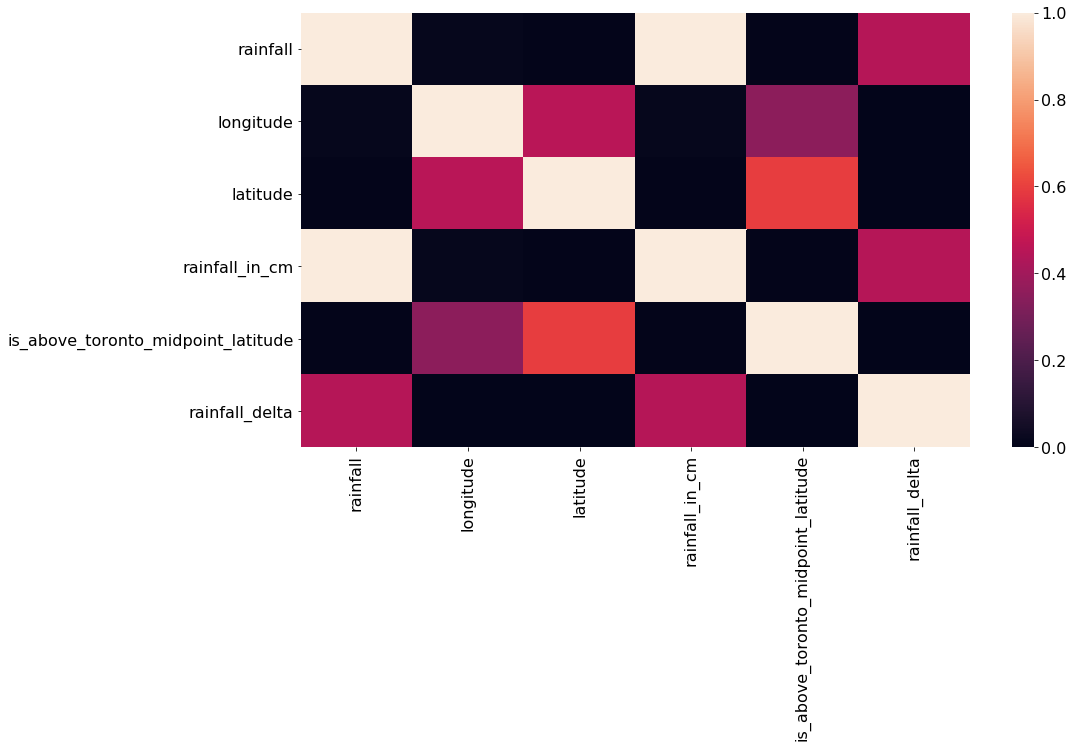

In [10]:
sns.heatmap(corr)

As expected, most variables in our dataset doesn't really correlate with one another. Afterall, it's hard to see how rainfall will influence the time index. You will notice how every variable is 100% correlated with itself (which makes sense).

Now that we have some prerequsite knowledge on how to plot and graph in Python, lets try to visualize something more challenging. 

One common type of data that participants often come accross with is geographic data. So let's try to plot a map of Toronto.

First we'll need to import GeoPandas, a library that helps us display maps, and the `Point` class from Shapely to extend the functionality of Geopandas (more on `Point` later. <br><br>Briefly, GeoPandas is a project that adds support for geographic data to Pandas objects. It currently implements the `GeoSeries` and `GeoDataFrame` types which are subclasses of the `pandas.Series` and `pandas.DataFrame` respectively. GeoPandas objects can also act on Shapely geometry objects and perform geometric operations.<br><br>
If you like to learn more, view the source for Geopandas [here](https://github.com/geopandas/geopandas) and the offical documentation [here](http://geopandas.org).


In [11]:
import geopandas as gpd
from shapely.geometry import Point

To begin, we'll use a shapefile from [Toronto's Open Data Portal](https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#e4ec3384-056f-aa59-70f7-9ad7706f31a3).

Wait, what is a shapefile?

**Shapefiles** are a format used to describe geographic data. From municipal boundaries to lakes, cities use shapefiles to keep track of property and geographic features. This particular shapefile describes Toronto's streets, pathways, rivers, highways etc.

Let's use the `read_file()` function from Geopandas to import the file into a dataframe!

In [12]:
toronto= gpd.read_file(path + "/Datasets/Workshops/centreline_wgs84/CENTRELINE_WGS84.shp")

Since Pandas has some support for shapefiles, we can easily visualize it using the `plot()` function

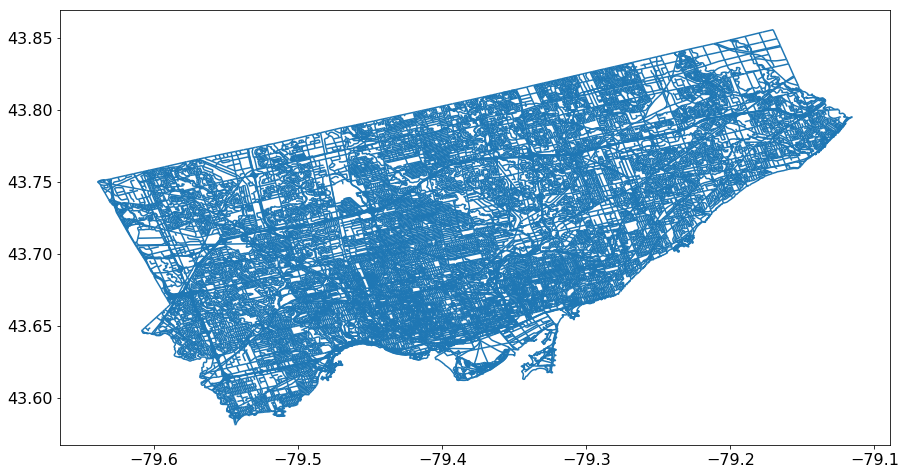

In [13]:
toronto.plot()

Hmmm it looks really congested. Let`s make it look pretty by adjusting the parameters for size and colour.

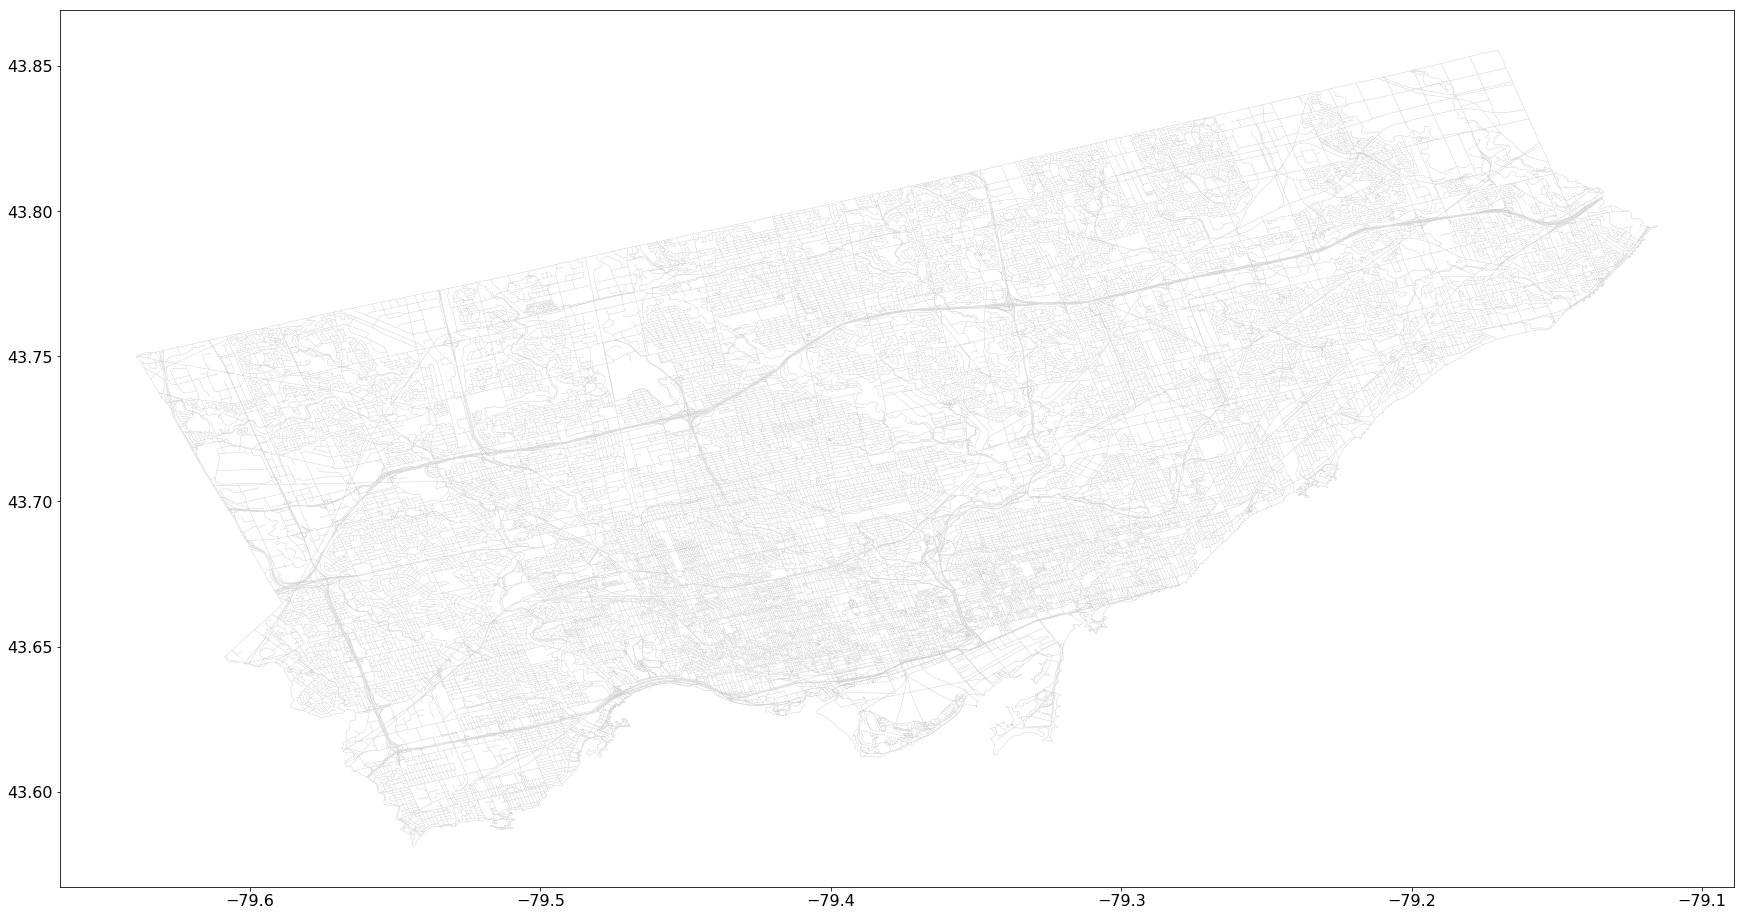

In [14]:
toronto.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(30,20))

# Changing the Coordinate Reference System (CRS)

Since shapefiles are a collection of points in an arbitrary space, Python doesn't know where to place these points in relation to the planet. This is where a CRS comes in handy, it makes sure that every layer has the same coordinate reference. So let's change the CRS of our dataframe!

*Note: Geometry operations in GeoPandas are Cartesian, so the coordinate reference system (crs) can be stored as an attribute on an object, and is automatically set when loading from a file.*

### Method 1: Changing the Projection
We'll use the Pandas `to_crs()` function and specify Pandas to use a Mercator projection. This will line up all the references.

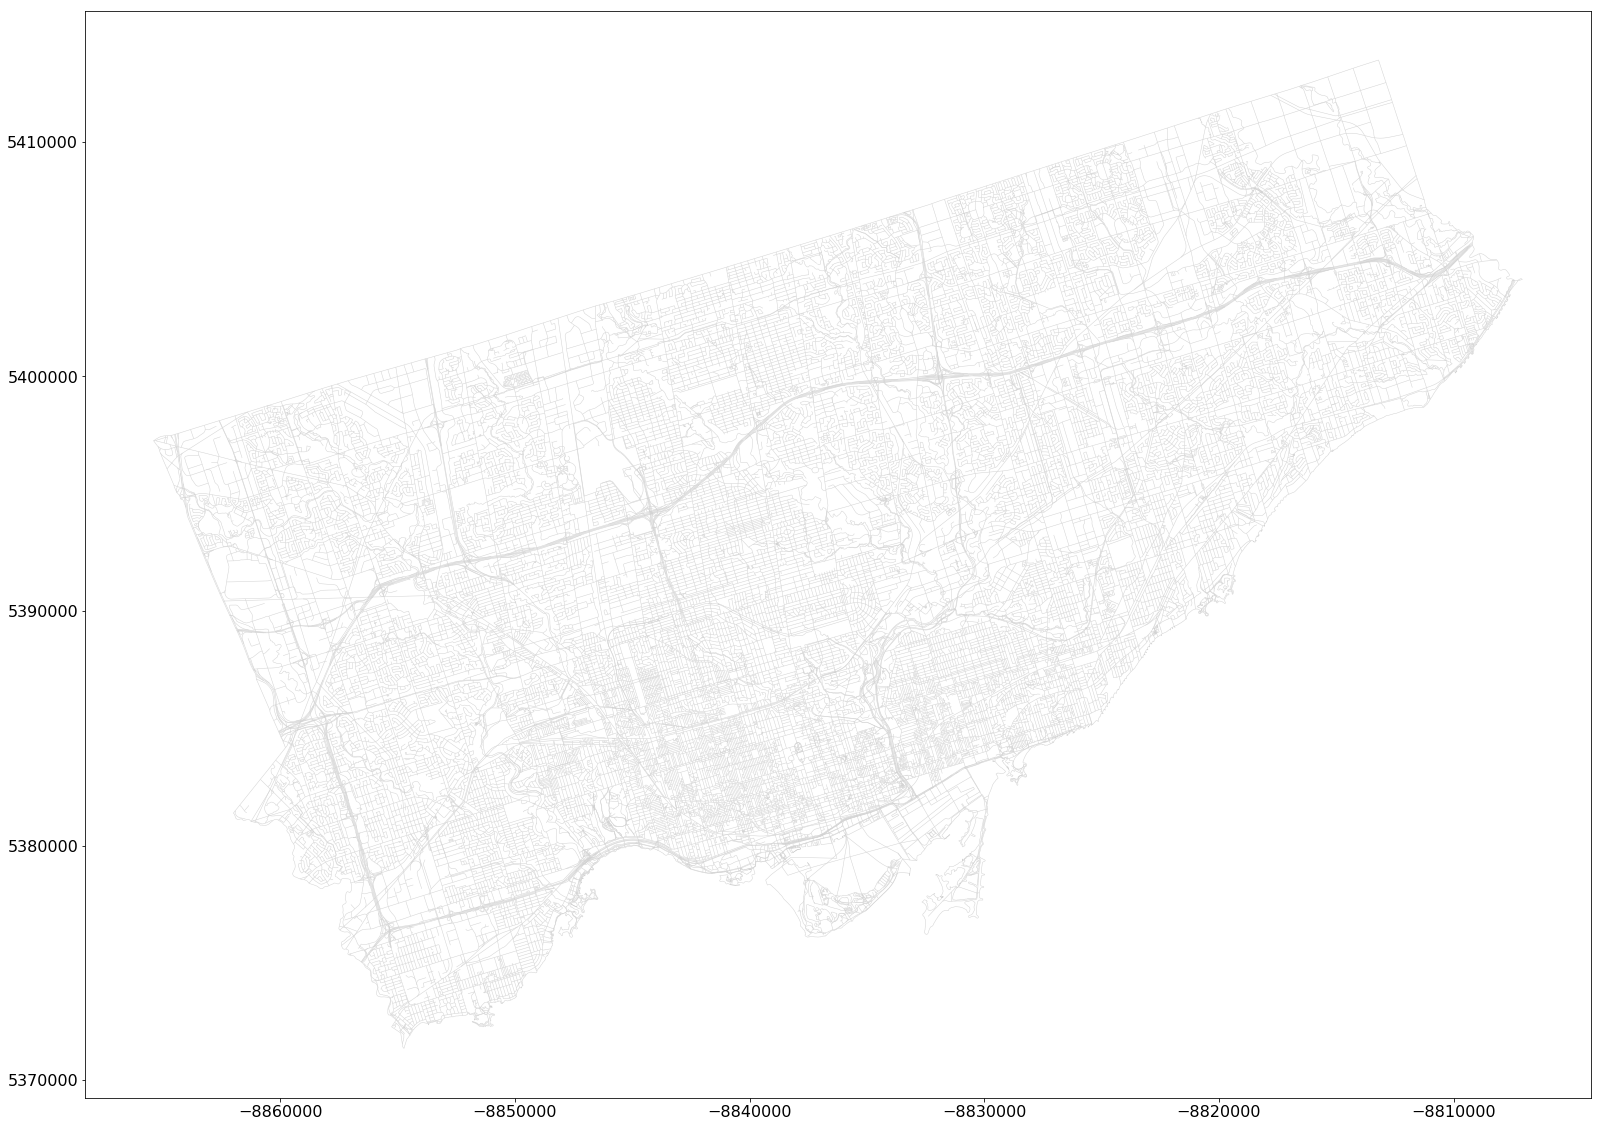

In [15]:
toronto.to_crs({'proj': 'merc'}).plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(30,20))

### Method 2: Specifying the projected coordinate system for your geographic coordinate
Each location on Earth has a precalculated projection code that describes how to change the crs. We found the code for Toronto (3857) [here](https://epsg.io/3857).

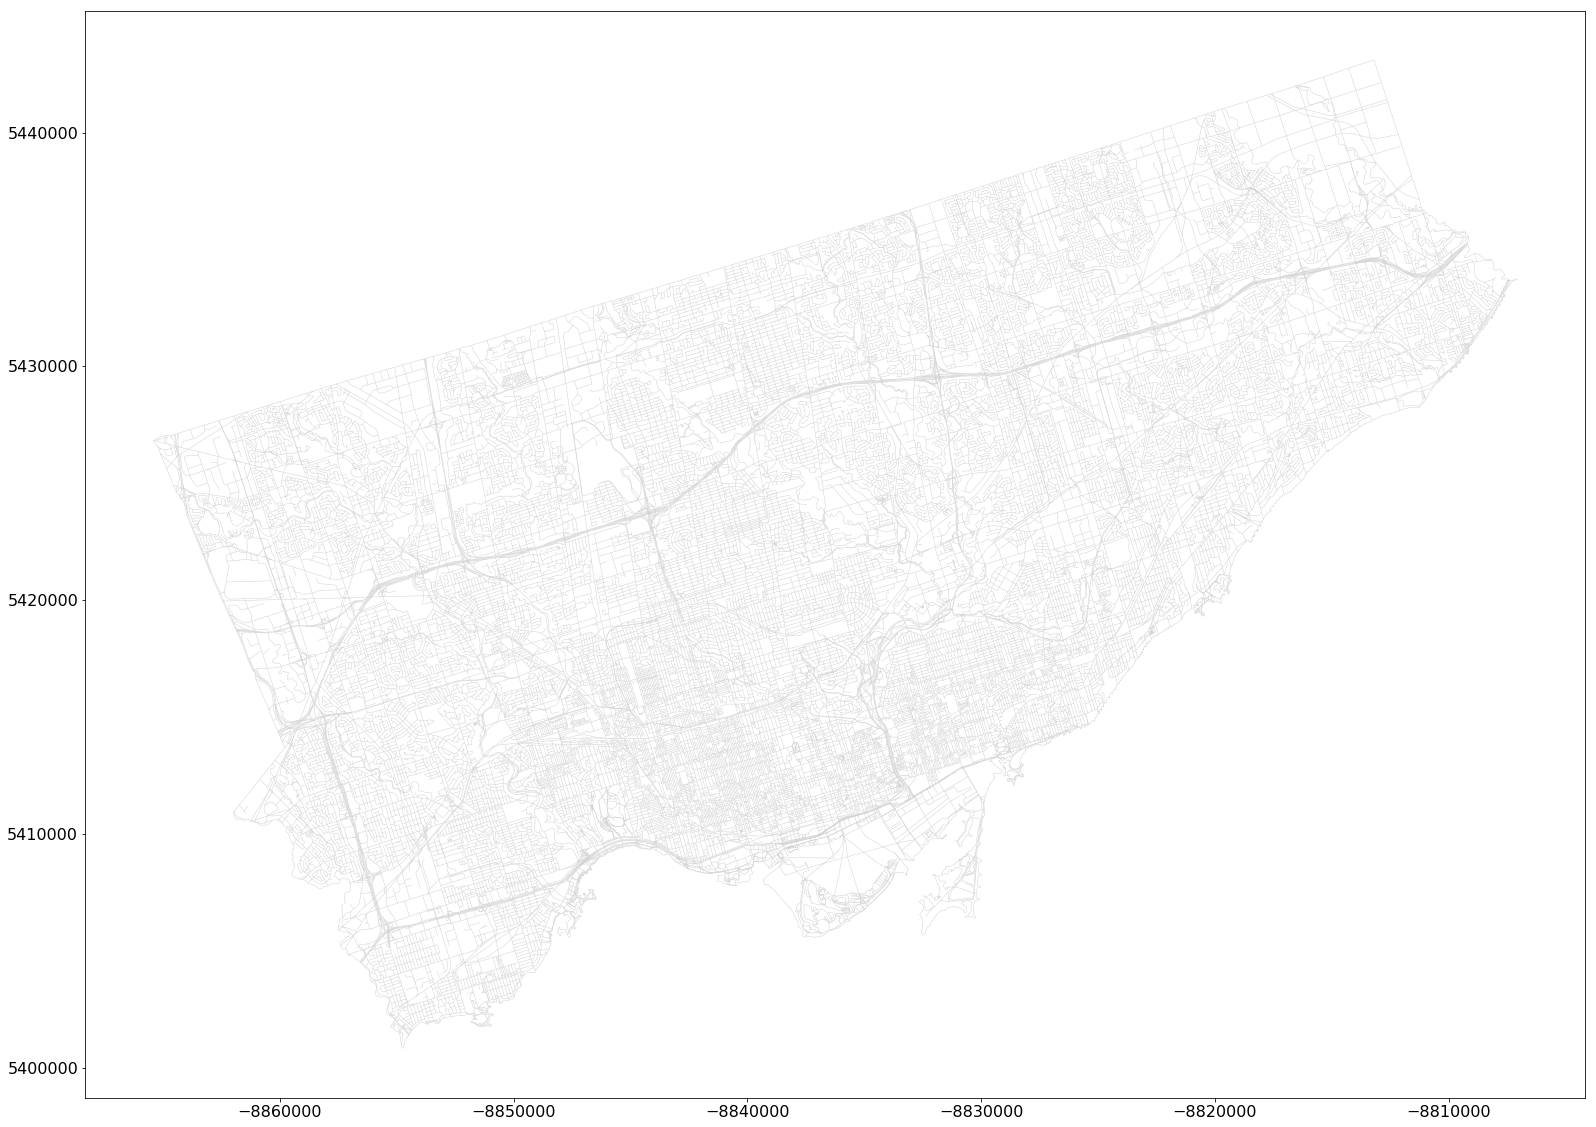

In [16]:
toronto.to_crs(epsg=3857).plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(30,20))

## Adding Data on a Map

Now that we have the map displayed, let's try to plot all of our rain gauge locations onto the map! We'll begin by importing the sites dataset.

In [17]:
sitesDF = pd.read_csv(path + "Datasets/Workshops/2017_rainfall_data/sites201706.csv")
sitesDF.head()

id    name  longitude   latitude
0  7677  RG_001 -79.478112  43.647680
1  7678  RG_002 -79.443616  43.651196
2  7679  RG_003 -79.405094  43.656616
3  7680  RG_004 -79.402833  43.678343
4  7681  RG_006 -79.375101  43.661265

Now that we have our coordinates, let's make a function to convert them into a Shapely `Point` so it can be plotted on our map!

In [18]:
def make_point(row):
    return Point(row.longitude, row.latitude)

Now we'll apply this function on our data frame.

In [19]:
points = sitesDF.apply(make_point, axis=1)

Again, let's plot our points using the GeoPandas `GeoDataFrame()` function.

In [20]:
rainGaugeLocations = gpd.GeoDataFrame(sitesDF, geometry=points)

Since our csv file does not come with a CRS, we need to initialize our GeoDataFrame with the correct epsg projection.

In [21]:
rainGaugeLocations.crs = {'init': 'epsg:4326'}

If we take a look at our `rainGaugeLocations` data frame you'll notice the new geometry column.

In [22]:
rainGaugeLocations.head()

id    name  longitude   latitude                               geometry
0  7677  RG_001 -79.478112  43.647680  POINT (-79.47811209999999 43.6476803)
1  7678  RG_002 -79.443616  43.651196  POINT (-79.44361590000001 43.6511961)
2  7679  RG_003 -79.405094  43.656616         POINT (-79.4050941 43.6566155)
3  7680  RG_004 -79.402833  43.678343          POINT (-79.4028332 43.678343)
4  7681  RG_006 -79.375101  43.661265          POINT (-79.375101 43.6612653)

Looks great! Let's plot the points.

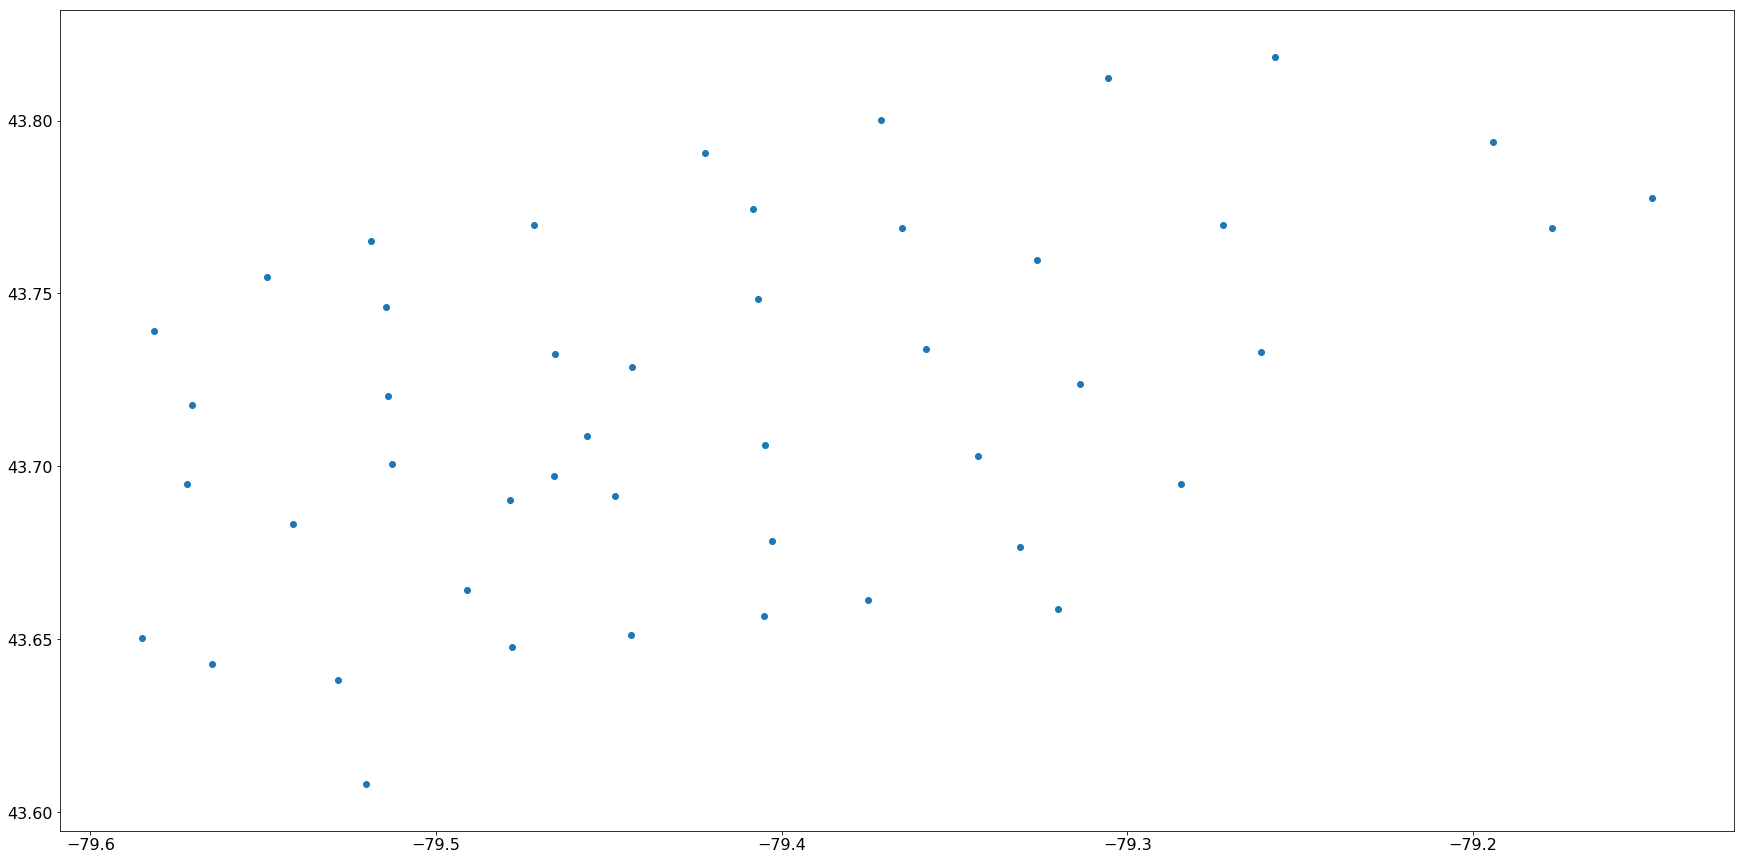

In [23]:
rainGaugeLocations.plot(figsize=(30,20))

## Setting the projection


Now we need to convert the rain gauge locations into different projections. In the typical Pandas fashion, you can achieve it in a lot of ways, but the easiest is to set the correct EPSG code.

You’ll also probably want to run `ax.axis('off')` to turn off the splines and axes!

(-79.66546602429999, -79.0890421037, 43.5672729356, 43.8691802424)

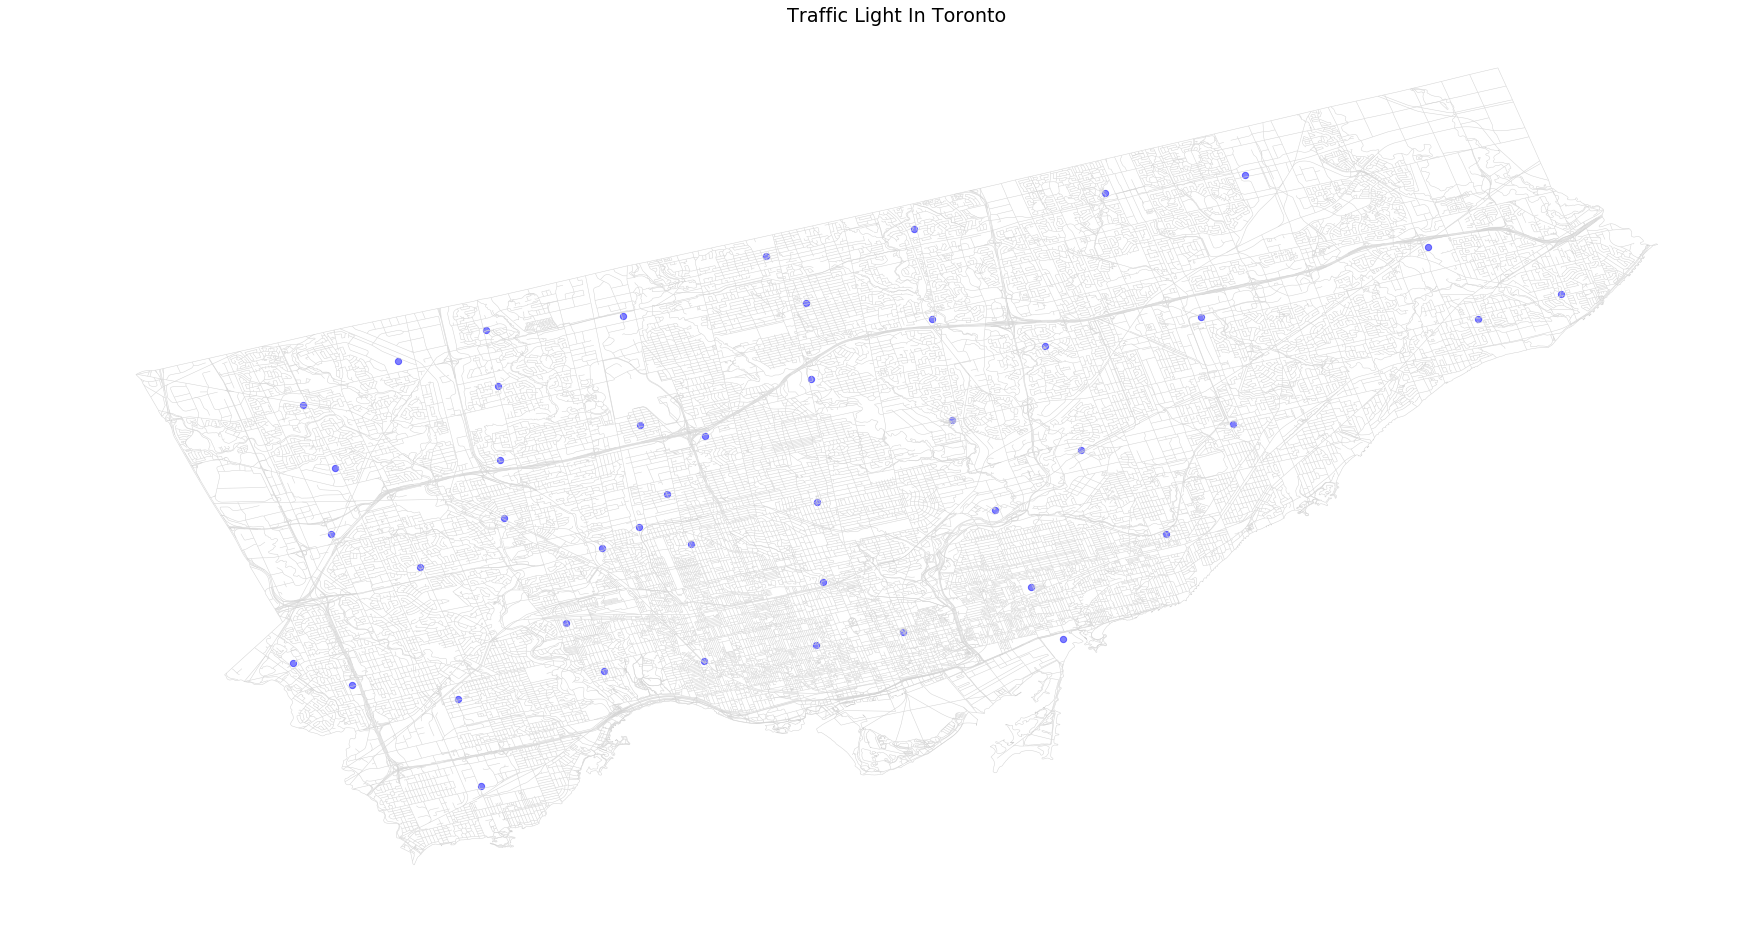

In [24]:
# Save the first layer as ax
ax = toronto.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(30,20))
ax.set_title("Traffic Light In Toronto")

# Pass ax=ax to the second layer
rainGaugeLocations.plot(figsize=(30,20), ax=ax, markersize=40, color='blue', alpha=0.5)
ax.axis('off')

Here is our map! Not that bad, but let's try something more difficult.

# Interactive map
For kicks let's create an interactive map using the Bokeh library. Bokeh is an interactive visualization library written for Python. Check out the offical reference for Bokeh here https://bokeh.pydata.org/en/latest/docs/reference.html.


In brief we'll have to:

1. Read the Shapefile into a `GeoDataFrame`
 
2. Calculate the x and y coordinates of the geometries into separate columns

3. Convert the `GeoDataFrame` into a Bokeh DataSource

4. Plot the x and y coordinates as points, lines or polygons (which are what Bokeh refers to as: circle, multi_line and patches)

We'll start by importing important classes.

In [25]:
from bokeh.plotting import figure, save, show, output_file
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper

Like the maps above we'll use our imported map of Toronto.

As a first step, let's print the geometry column in our toronto data frame to see where the two x and y coordinates are placed.

In [26]:
toronto['geometry'].head()

0    LINESTRING (-79.54477895300001 43.58582902, -7...
1    LINESTRING (-79.54477895300001 43.58582902, -7...
2    LINESTRING (-79.54454241099999 43.586108989, -...
3    LINESTRING (-79.54454241099999 43.586108989, -...
4    LINESTRING (-79.54386166 43.586681614, -79.543...
Name: geometry, dtype: object

Seems like the geometry column contains information about the x and y coordinates of the different features of the shape files. Let's see if we can access the first x-coordinate of the first row.

In [27]:
toronto.iloc[0]["geometry"].coords.xy[0]

array('d', [-79.544778953, -79.544780261, -79.544775783, -79.544765239, -79.544745792, -79.544725956, -79.544683728, -79.544604958, -79.544554787, -79.543588412, -79.543552869, -79.543514934, -79.543496319, -79.543484165, -79.543475234, -79.543467909, -79.543461738, -79.543461604, -79.543463164, -79.543463932, -79.543463451, -79.543462583, -79.543462555, -79.543461728, -79.543464934, -79.543473809, -79.543489945, -79.543518214, -79.54360502, -79.543618731, -79.543619525, -79.543615455, -79.543603299, -79.543583864, -79.543580508, -79.543579303, -79.543581072, -79.543588182, -79.54359351, -79.543602405, -79.543611301, -79.543623759, -79.543634439, -79.543652242, -79.543678954, -79.543709234, -79.543739507, -79.543775126, -79.543807177, -79.543839233, -79.54386237, -79.543887282, -79.543903294, -79.543917519, -79.543929967, -79.54393529, -79.543938835, -79.543940595, -79.543942338, -79.543947651, -79.543954731, -79.543960061, -79.54396718, -79.543979645, -79.543995679, -79.544017062, -79

Nice! we can access the x and y coords of the geometry objects described by the shapefile. Now let's take these coordinates and create 2 functions to return these coordinates. The reason why we are concerned with mannually extracting the x and y coords from the shape file is because there is no GeoPandas implementation to tell Bokeh how to access these points.<br>
<br>
So let’s create our own function called `getPointCoords()` and `getLineCoords()` which will return the x or y coordinate of a given geometry. It shall have two parameters: `geom` and `coord_type` where the first one should be a Shapely geometry object and coord_type should be either `x` or `y`.

In [28]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [29]:
def getLineCoords(row, geom, coord_type):
    """Returns a list of coordinates ('x' or 'y') of a LineString geometry"""
    if coord_type == 'x':
        return list( row[geom].coords.xy[0] )
    elif coord_type == 'y':
        return list( row[geom].coords.xy[1] )

Let`s make a copy of data frame before we modify it

In [30]:
map_copy = toronto.copy()
tl_copy = rainGaugeLocations.copy()

In [31]:
# Calculate the coordinates
tl_copy['x'] = rainGaugeLocations.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
tl_copy['y'] = rainGaugeLocations.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

map_copy['x'] = toronto.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
map_copy['y'] = toronto.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

Since the function that Bokeh uses to ingest our coordinatess does not understand Shapely geometry objects, we need to remove the geometry column.<br><br> *Note: This mysterious function is `ColumnDataSource()`.*

In [32]:
tl_copy = tl_copy.drop('geometry', axis=1)
map_copy = map_copy.drop('geometry', axis=1)

Now we can convert our data frame into a `ColumnDataSource`.

In [33]:
psource = ColumnDataSource(tl_copy)
msource = ColumnDataSource(map_copy)

Now we end up with a `ColumnDataSource` object that has our data stored in a way that Bokeh wants it.

Finally, we can make a `Point` map of those points in a fairly similar manner as in the first example. Now instead of passing the coordinate lists, we can pass the data as a source for the plot with column names containing those coordinates.

In [34]:
p = figure(title="A map of traffic lights in toronto")

# Plot grid
p.patches('x', 'y', source=msource,
         fill_alpha=1.0, line_color="black", line_width=0.05)

# Add points on top (as black points)
p.circle('x', 'y', size=3, source=psource, color="black")

# show the figure

bokeh.models.renderers.GlyphRenderer(
    id='4e56b67b-b11f-464c-af5b-2b287df069ad',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='334c898b-0aa1-4539-8abe-fc3c826b5160',
        callback=None,
        data={'latitude': {'__ndarray__': 'uWElMOfSRUAxZNBkWtNFQPpFCfoL1EVAOjyE8dPWRUBkvWJXpNRFQIty5cOe1kVAhtRIpp7eRUCEiuQK89hFQCZlOaZ610VA+w9+HKzRRUBir8EM181FQIVRucZC2UVAeloYRwDaRUD8qHH08uFFQBO42GGK4kVAI0qckZjgRUC0w8K9cOJFQE+CSNCp3EVAUJC34DXcRUC6hyHFwt1FQGYV09gg40VAd+tnd2nmRUDREhp3OeFFQA/1WIb650VAzHBu2cLoRUCpd0THhuJFQDqSDZya5UVAAeYxNU/URUDE2J1J9t1FQLZ8LJaF40VALXTKSGLaRUBUIO1e8thFQCdyHNNu4kVAp/iu99HdRUDNSXvFy99FQF/r92mB2EVA+QbT7t/bRUB/74D8ttpFQKVcK+tI0kVAyZ/7tALVRUDJVGbvMeVFQHRTFPk/00VAM34KFVbYRUD7oUbfrNlFQLwIU5RL3UVATwQvAnzfRUA=',
          'shape': (46,),
          'dtype': 'float64'},
         'index': [0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23,
          24,
          25,
          26,
          27,
          28,
          29,
          30,
          31,
          32,
          33,
          34,
          35,
          36,
          37,
          38,
          39,
          40,
          41,
          42,
          43,
          44,
          45],
         'x': {'__ndarray__': 'mVR+Y5neU8AVn/EzZNxTwF3TzQ/t2VPAju/mBMjZU8Ca7J+nAdhTwJzS6nkx1VPAKgOkiTnlU8BdNpWgmuRTwN03CISn4lPAn8/8Qc/hU8D2NR6uTeFTwGXyMGfT3VPAWkUPXfjVU8DztYOiNOFTwGsAwsku3lPA+JRShiDjU8AIdtsJX9dTwI1XixUW1FPAmxaCPeLgU8DhJDBKzt1TwB7fQWAj2lPAdbJxUMTXU8BqU9BI39RTwFXIjQmO01PA/JIJz3bQU8D8iIC/b9FTwFbkpdVvzFPAK7kvDH3UU8CvCSdx79ZTwO62RXh/yVPAMcM1LefZU8Cq3lSDNNJTwGiaC7dXy1PATXBFvbvQU8AMrAQHC9pTwB0AcVev3FPAk3vTV4TkU8AzdbIvNN1TwGVhPg8k5FPANrB2kG7fU8Bu5YC4BttTwAtaUDFx5VPAkGPSfKHeU8CNWDCWzuBTwI5AvK5f3FPA3HPs4u7gU8A=',
          'shape': (46,),
          'dtype': 'float64'},
         'name': ['RG_001',
          'RG_002',
          'RG_003',
          'RG_004',
          'RG_006',
          'RG_007',
          'RG_012',
          'RG_013',
          'RG_014',
          'RG_015',
          'RG_016',
          'RG_017',
          'RG_018',
          'RG_019',
          'RG_020',
          'RG_021',
          'RG_022',
          'RG_023',
          'RG_024',
          'RG_025',
          'RG_027',
          'RG_028',
          'RG_030',
          'RG_031',
          'RG_033',
          'RG_034',
          'RG_035',
          'RG_036',
          'RG_037',
          'RG_038',
          'RG_039',
          'RG_040',
          'RG_041',
          'RG_042',
          'RG_044',
          'RG_045',
          'RG_046',
          'RG_047',
          'RG_048',
          'RG_049',
          'RG_051',
          'RG_052',
          'RG_053',
          'RG_054',
          'RG_055',
          'RG_056'],
         'y': {'__ndarray__': 'uWElMOfSRUAxZNBkWtNFQPpFCfoL1EVAOjyE8dPWRUBkvWJXpNRFQIty5cOe1kVAhtRIpp7eRUCEiuQK89hFQCZlOaZ610VA+w9+HKzRRUBir8EM181FQIVRucZC2UVAeloYRwDaRUD8qHH08uFFQBO42GGK4kVAI0qckZjgRUC0w8K9cOJFQE+CSNCp3EVAUJC34DXcRUC6hyHFwt1FQGYV09gg40VAd+tnd2nmRUDREhp3OeFFQA/1WIb650VAzHBu2cLoRUCpd0THhuJFQDqSDZya5UVAAeYxNU/URUDE2J1J9t1FQLZ8LJaF40VALXTKSGLaRUBUIO1e8thFQCdyHNNu4kVAp/iu99HdRUDNSXvFy99FQF/r92mB2EVA+QbT7t/bRUB/74D8ttpFQKVcK+tI0kVAyZ/7tALVRUDJVGbvMeVFQHRTFPk/00VAM34KFVbYRUD7oUbfrNlFQLwIU5RL3UVATwQvAnzfRUA=',
          'shape': (46,),
          'dtype': 'float64'},
         'longitude': {'__ndarray__': 'mVR+Y5neU8AVn/EzZNxTwF3TzQ/t2VPAju/mBMjZU8Ca7J+nAdhTwJzS6nkx1VPAKgOkiTnlU8BdNpWgmuRTwN03CISn4lPAn8/8Qc/hU8D2NR6uTeFTwGXyMGfT3VPAWkUPXfjVU8DztYOiNOFTwGsAwsku3lPA+JRShiDjU8AIdtsJX9dTwI1XixUW1FPAmxaCPeLgU8DhJDBKzt1TwB7fQWAj2lPAdbJxUMTXU8BqU9BI39RTwFXIjQmO01PA/JIJz3bQU8D8iIC/b9FTwFbkpdVvzFPAK7kvDH3UU8CvCSdx79ZTwO62RXh/yVPAMcM1LefZU8Cq3lSDNNJTwGiaC7dXy1PATXBFvbvQU8AMrAQHC9pTwB0AcVev3FPAk3vTV4TkU8AzdbIvNN1TwGVhPg8k5

Let's add the interative tool to our map

In [35]:
my_hover = HoverTool()
my_hover.tooltips = [('Address of the point', '@address')]
p.add_tools(my_hover)

Lastly, let's see how our map looks like!

In [36]:
show(p)

If you loved this map don't forget to save it in your local machine.

In [37]:
outfp = r"trafficlightsToronto_map.html"
output_file('plot.html', mode='inline')
save(obj=p, filename=outfp)

'/Users/curtis/Desktop/analysis/2019_bdc_workshops/Week3_Data_Visualization/trafficlightsToronto_map.html'

That's it, congratulations on finishing the workshop for data visulazation! I hope this tutorial was helpful and please don't hesitate to ask for help. Feedback that you provide will be taken into consideration for future workshops and I hope that you learned something. Good luck on your projects!